# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
!pip install webdriver_manager

In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as soup
from splinter import Browser
import pandas as pd
import matplotlib.pyplot as plt


# Set up the browser
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
browser = webdriver.Chrome(service=service, options=options)

In [51]:
executable_path = {'executable_path': 'chromedriver'}
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [55]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [58]:
# Create a Beautiful Soup Object
html= browser.html
temp_soup = soup(html, 'html.parser')

In [60]:
# Extract all rows of data
table = temp_soup.find('table', class_='table')

rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Create an empty list
data =[]

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols =row.find_all('td')
    data.append([col.text.strip() for col in cols])

In [65]:
# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)


In [67]:
# Confirm DataFrame was created successfully
# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

#Display the first few rows of the Datazframe
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [70]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [75]:
# 1. How many months are there on Mars?
mars_months = df['month'].nunique()
mars_months

12

In [77]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = df['sol'].nunique()
martian_days

1867

In [79]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

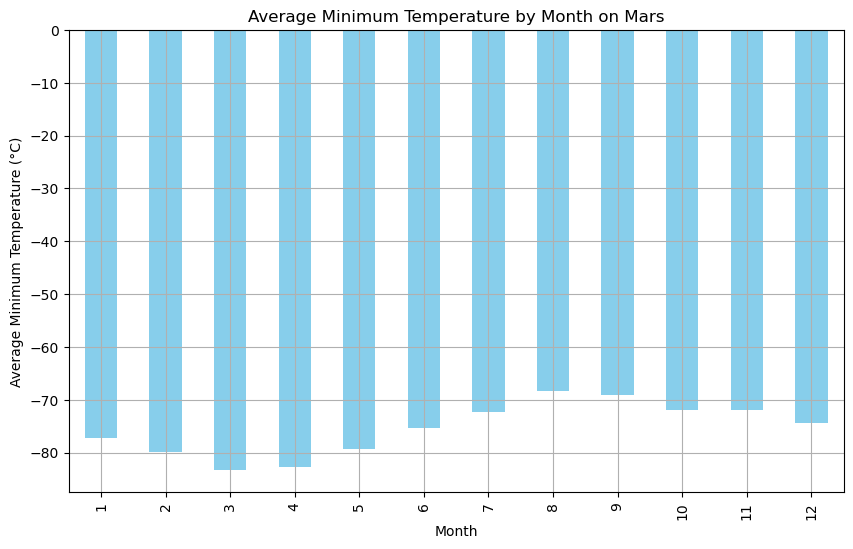

In [83]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.grid(True)
plt.show()


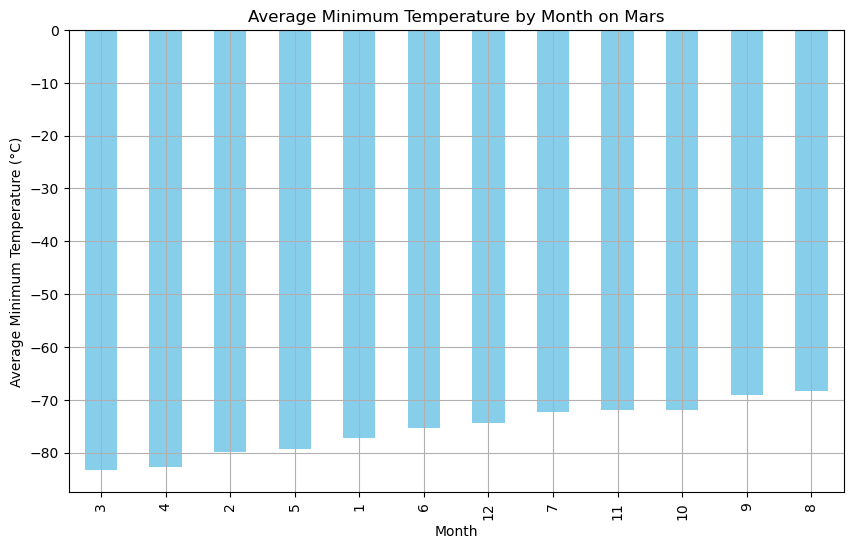

The coldest month is: 3
The hottest month is: 8


In [85]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Group the data by month and calculate the average minimum temperature
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the months by average temperature
sorted_temp = avg_temp_by_month.sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
sorted_temp.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.grid(True)
plt.show()

# Identify the months with the coldest and hottest temperatures
coldest_month = sorted_temp.idxmin()
hottest_month = sorted_temp.idxmax()

print(f"The coldest month is: {coldest_month}")
print(f"The hottest month is: {hottest_month}")


In [89]:
# Calculate the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Convert the Series to a list of tuples
avg_pressure_list = [(month, pressure) for month, pressure in avg_pressure_by_month.items()]

# Print the list
avg_pressure_list


[(1, 862.4885057471264),
 (2, 889.4550561797753),
 (3, 877.3229166666666),
 (4, 806.3298969072165),
 (5, 748.5570469798657),
 (6, 745.0544217687075),
 (7, 795.1056338028169),
 (8, 873.8297872340426),
 (9, 913.3059701492538),
 (10, 887.3125),
 (11, 857.0144927536232),
 (12, 842.156626506024)]

In [17]:
# 4. What is the average pressure by month?


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


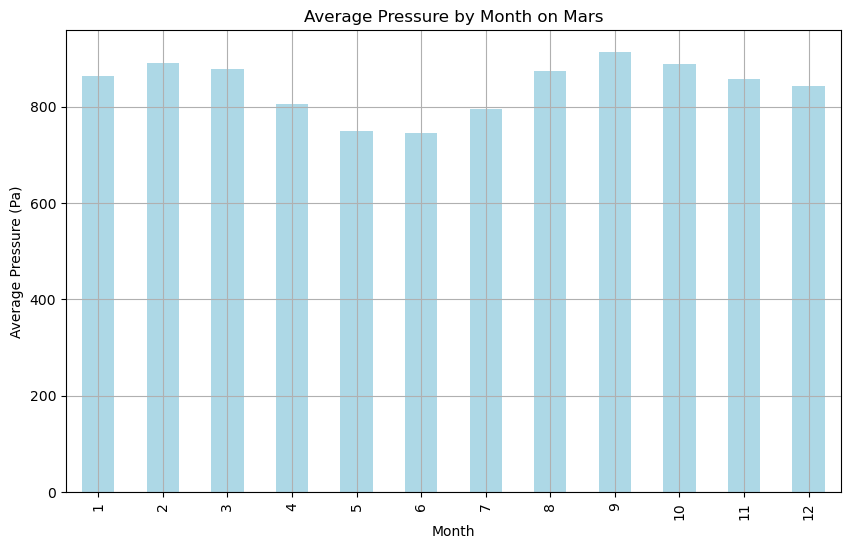

In [103]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='lightblue')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Month on Mars')
plt.grid(True)
plt.show()


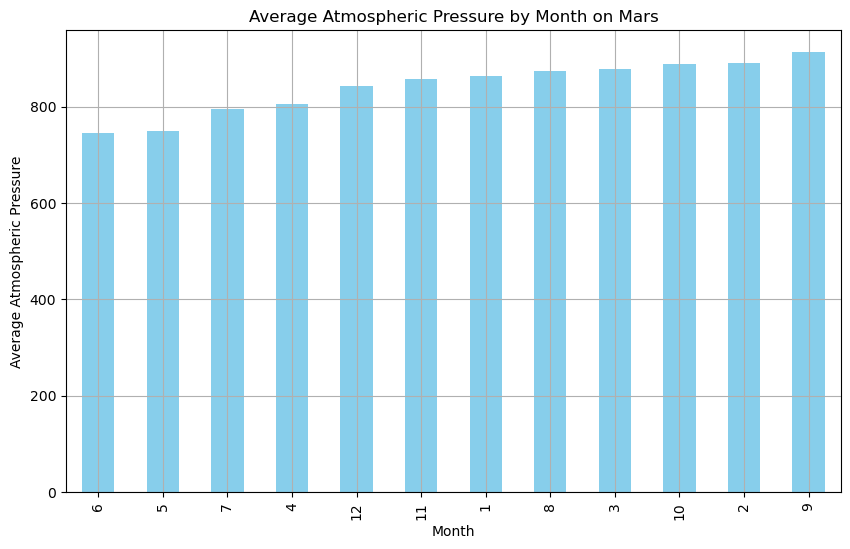

The month with the lowest atmospheric pressure is: 6
The month with the highest atmospheric pressure is: 9


In [99]:
# Group the data by month and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the months by average pressure
sorted_pressure = avg_pressure_by_month.sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
sorted_pressure.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.grid(True)
plt.show()

# Identify the months with the lowest and highest pressure
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()

print(f"The month with the lowest atmospheric pressure is: {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure is: {highest_pressure_month}")


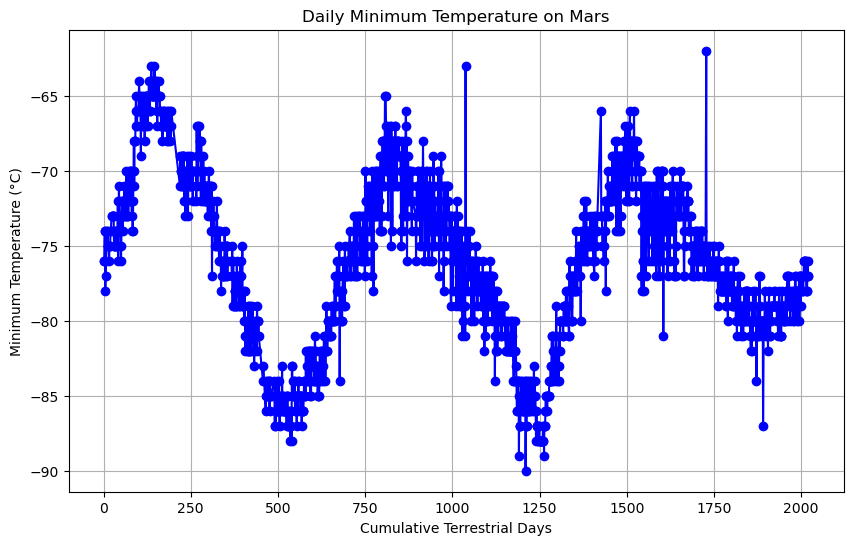

In [101]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Ensure all necessary columns are converted to appropriate types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['min_temp'] = df['min_temp'].astype(float)

# Sort the DataFrame by terrestrial_date
df = df.sort_values('terrestrial_date')

# Calculate the difference in terrestrial days between each observation
df['terrestrial_date_diff'] = df['terrestrial_date'].diff().dt.days

# Cumulative sum of the differences to estimate Martian year duration
df['cumulative_days'] = df['terrestrial_date_diff'].cumsum()

# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(df['cumulative_days'], df['min_temp'], marker='o', linestyle='-', color='b')
plt.xlabel('Cumulative Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv(mars_weaher.csv', index=False)

In [22]:
browser.quit()